In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
from random import sample
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import scipy

#### Load Data

In [7]:
dataset = pd.read_csv('DrugData_0.csv')
dataset1 = pd.read_csv('DrugData_1.csv')
dataset2 = pd.read_csv('DrugData_2.csv')
print(dataset)

            gIn         iIn      gOut      iOut     giOut
0   3278.703496  219.372180  0.834983  0.083604  0.069808
1    178.558393  190.779228  0.763228  0.073502  0.056099
2   4245.646529  382.758394  0.753997  0.091862  0.069264
3   4669.966239  397.599951  0.780171  0.119731  0.093411
4   3393.675774   93.436302  0.865255  0.079765  0.069017
5   3788.700653  244.882198  0.822668  0.089866  0.073930
6   3715.662341  222.793100  0.803950  0.087122  0.070042
7   1961.135098  323.156505  0.736792  0.088398  0.065131
8   3277.389451  354.682415  0.731979  0.100868  0.073833
9    855.933439  377.343341  0.673579  0.069151  0.046578
10  3530.230440  138.012539  0.856315  0.079243  0.067857
11   159.164232  339.851338  0.669478  0.076337  0.051106
12  1384.614925  327.549002  0.675444  0.107319  0.072488
13   230.856953   81.305868  0.792373  0.059670  0.047281
14   485.658906   59.498841  0.806880  0.049853  0.040226
15  4117.289142  249.182026  0.825904  0.082470  0.068112
16  3474.14311

In [8]:
dataset_0_g = dataset.drop(['iIn', 'iOut'], axis=1)
dataset_0_I = dataset.drop(['gIn', 'giOut'], axis=1)

dataset_1_g = dataset1.drop(['iIn', 'iOut'], axis=1)
dataset_1_I = dataset1.drop(['gIn', 'giOut'], axis=1)

dataset_2_g = dataset2.drop(['iIn', 'iOut'], axis=1)
dataset_2_I = dataset2.drop(['gIn', 'giOut'], axis=1)

In [ ]:
#Fit linear model with data from experiment 1
mod0_g= ols('gIn ~ 1 + gOut + giOut', data=dataset_0_g).fit()
print(mod0_g.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     36.07
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           7.64e-07
Time:                        04:20:34   Log-Likelihood:                -159.74
No. Observations:                  20   AIC:                             325.5
Df Residuals:                      17   BIC:                             328.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.014e+04   2360.895     -4.296      0.0

In [10]:
y_fittedtest = mod0_g.fittedvalues
print(y_fittedtest)

0     3476.398757
1     1537.898677
2     2775.760519
3     5390.261798
4     3639.257291
5     3788.764083
6     3251.998168
7     2226.709249
8     3055.194080
9     -126.154508
10    3452.336506
11     292.178407
12    2469.965677
13     892.023395
14     304.995793
15    3235.004950
16    2649.274470
17    2483.676534
18    4233.289940
19     227.333389
dtype: float64


In [11]:
mod0_I= ols('iIn ~ 1 + gOut + iOut', data=dataset_0_I).fit()
print(mod0_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     32.03
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.71e-06
Time:                        04:20:39   Log-Likelihood:                -107.97
No. Observations:                  20   AIC:                             221.9
Df Residuals:                      17   BIC:                             224.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    725.9702    198.345      3.660      0.0

In [12]:
mod1_g= ols('gIn ~ 1 + gOut + giOut', data=dataset_1_g).fit()
print(mod1_g.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     6.676
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00725
Time:                        04:20:41   Log-Likelihood:                -167.70
No. Observations:                  20   AIC:                             341.4
Df Residuals:                      17   BIC:                             344.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3582.9628   1845.238     -1.942      0.0

In [13]:
mod1_I= ols('iIn ~ 1 + gOut + iOut', data=dataset_1_I).fit()
print(mod1_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     67.37
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           8.31e-09
Time:                        04:20:43   Log-Likelihood:                -108.20
No. Observations:                  20   AIC:                             222.4
Df Residuals:                      17   BIC:                             225.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    656.7862    134.257      4.892      0.0

In [14]:
mod2_g= ols('gIn ~ 1 + gOut + giOut', data=dataset_2_g).fit()
print(mod2_g.summary())

                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     148.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.74e-11
Time:                        04:20:45   Log-Likelihood:                -140.59
No. Observations:                  20   AIC:                             287.2
Df Residuals:                      17   BIC:                             290.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9575.6072    953.989    -10.037      0.0

In [15]:
mod2_I= ols('iIn ~ 1 + gOut + iOut', data=dataset_2_I).fit()
print(mod2_I.summary())

                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     29.19
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.18e-06
Time:                        04:20:47   Log-Likelihood:                -109.47
No. Observations:                  20   AIC:                             224.9
Df Residuals:                      17   BIC:                             227.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    797.0927    219.327      3.634      0.0

In [ ]:
print(scipy.stats.f.ppf(q=1-.025, dfn=2, dfd=17))   # alpha= 0.05/2 F(alpha, p-1, n-p)   p: num of prameters n:num of samples
print(scipy.stats.t.ppf(q=.025, df=17))

4.618874327514398
-2.109815577833181


In [28]:
def residuals_plot(mod, dataset, Y_name):
    #Variables that will be needed for plotting
    residuals = mod.resid
    y_fitted = mod.fittedvalues
    row = []
    for i in range(np.array(dataset[Y_name]).size):
        row.append(i)

    #CASE ORDER PLOTS OF RESIDUALS
    fig1=sns.residplot(x=row, y=residuals)
    plt.title('Exp 1: Case order plot of residuals')
    plt.ylabel('Residuals')
    plt.xlabel('Row Number')
    plt.show()

    #PLOT OF RESIDUALS VS. FITTED VALUES
    fig2=sns.residplot(x=y_fitted, y=residuals)
    plt.title('Exp 1: Plot of residuals vs. fitted values')
    plt.ylabel('Residuals')
    plt.xlabel('Fitted Values')
    plt.show()


    #HISTOGRAM PLOT OF RESIDUALS
    fig3=plt.hist(residuals,list(np.linspace(round(min(residuals))-10, round(max(residuals))+10,7)),density=True)  
    plt.title('Exp 1: Histograms of residuals')
    plt.ylabel('Frequency')
    plt.xlabel('Residuals')
    plt.show()

    #NORMAL PROBABILITY PLOT
    pplot1 = sm.ProbPlot(residuals)
    pplot1.qqplot(line='s')
    plt.title('Exp 1: Normal Probability Plot')
    return fig1, fig2, fig3

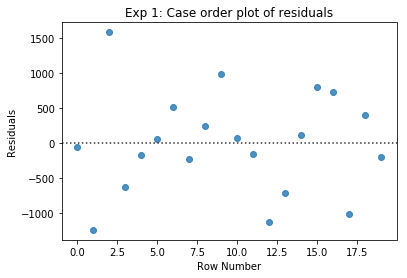

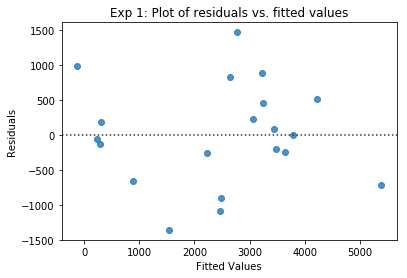

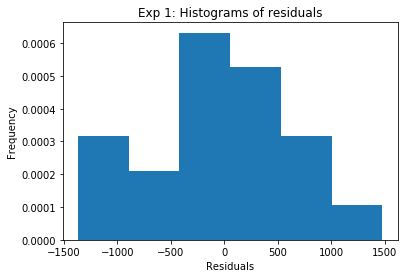

(<matplotlib.axes._subplots.AxesSubplot at 0x20724c310f0>,
 (array([0.0003159, 0.0002106, 0.0006318, 0.0005265, 0.0003159, 0.0001053]),
  array([-1369.        ,  -894.16666667,  -419.33333333,    55.5       ,
           530.33333333,  1005.16666667,  1480.        ]),
  <a list of 6 Patch objects>))

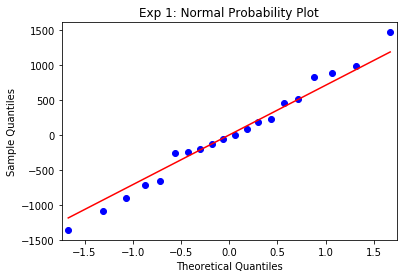

In [31]:
residuals_plot(mod0_g, dataset, 'gIn')

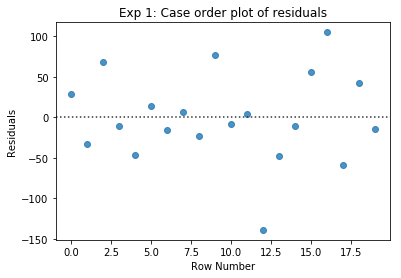

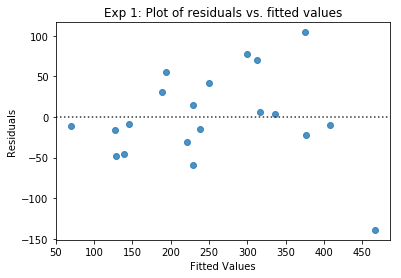

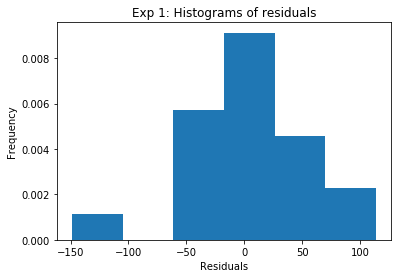

(<matplotlib.axes._subplots.AxesSubplot at 0x20724db3048>,
 (array([0.00114068, 0.        , 0.00570342, 0.00912548, 0.00456274,
         0.00228137]),
  array([-149.        , -105.16666667,  -61.33333333,  -17.5       ,
           26.33333333,   70.16666667,  114.        ]),
  <a list of 6 Patch objects>))

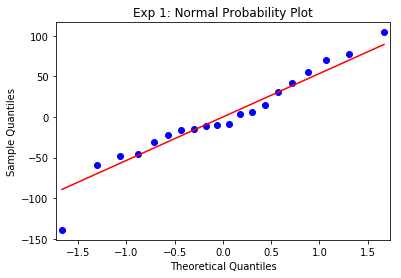

In [32]:
residuals_plot(mod0_I, dataset, 'iIn')

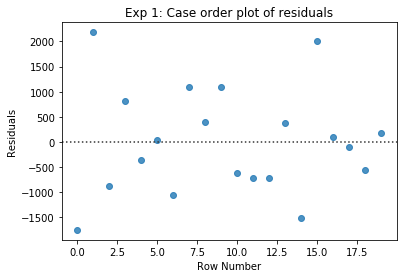

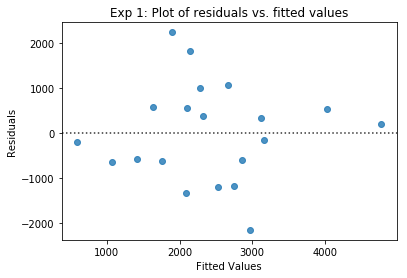

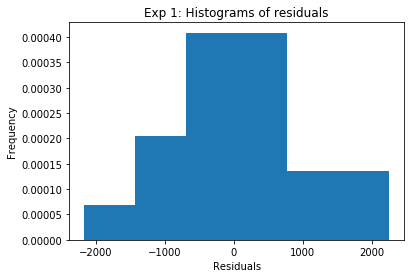

(<matplotlib.axes._subplots.AxesSubplot at 0x20724c10320>,
 (array([6.80735194e-05, 2.04220558e-04, 4.08441116e-04, 4.08441116e-04,
         1.36147039e-04, 1.36147039e-04]),
  array([-2163. , -1428.5,  -694. ,    40.5,   775. ,  1509.5,  2244. ]),
  <a list of 6 Patch objects>))

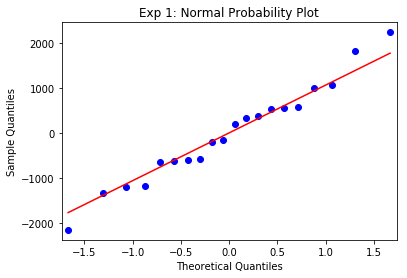

In [33]:
residuals_plot(mod1_g, dataset1, 'gIn')

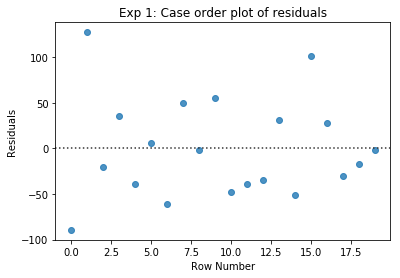

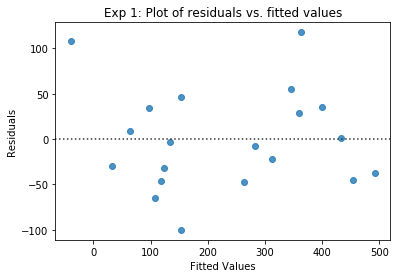

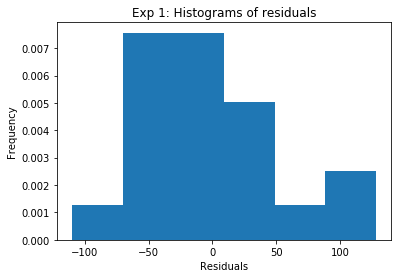

(<matplotlib.axes._subplots.AxesSubplot at 0x20724e7def0>,
 (array([0.0012605 , 0.00756303, 0.00756303, 0.00504202, 0.0012605 ,
         0.00252101]),
  array([-110.        ,  -70.33333333,  -30.66666667,    9.        ,
           48.66666667,   88.33333333,  128.        ]),
  <a list of 6 Patch objects>))

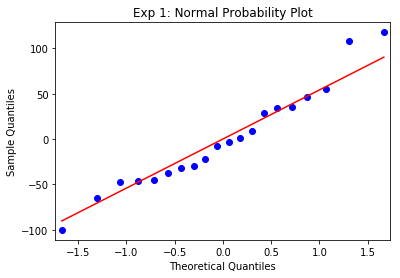

In [34]:
residuals_plot(mod1_I, dataset1, 'iIn')

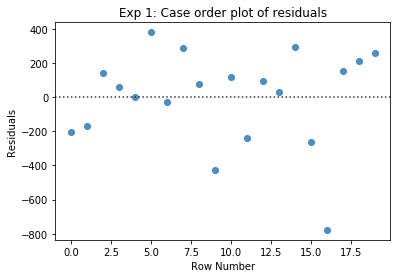

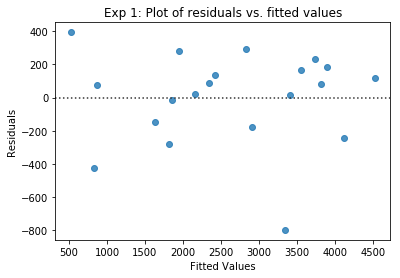

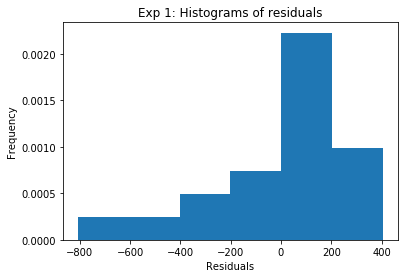

(<matplotlib.axes._subplots.AxesSubplot at 0x207233e1ac8>,
 (array([0.00024773, 0.00024773, 0.00049546, 0.00074319, 0.00222956,
         0.00099092]),
  array([-8.07000000e+02, -6.05166667e+02, -4.03333333e+02, -2.01500000e+02,
          3.33333333e-01,  2.02166667e+02,  4.04000000e+02]),
  <a list of 6 Patch objects>))

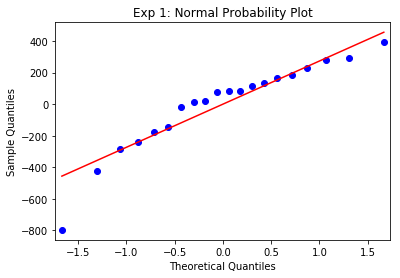

In [29]:
residuals_plot(mod2_g, dataset2, 'gIn')

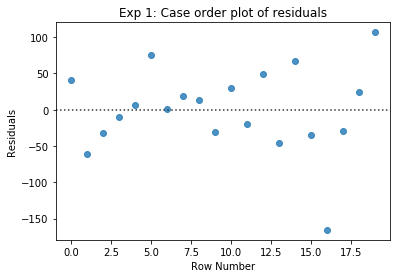

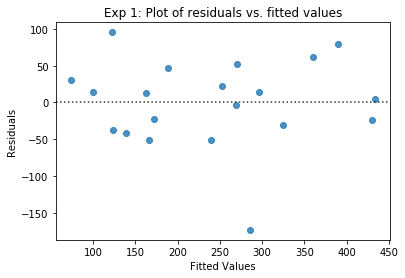

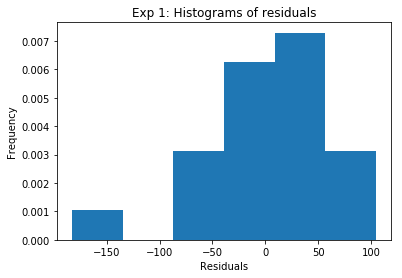

(<matplotlib.axes._subplots.AxesSubplot at 0x20723673b38>,
 (array([0.00104167, 0.        , 0.003125  , 0.00625   , 0.00729167,
         0.003125  ]),
  array([-183., -135.,  -87.,  -39.,    9.,   57.,  105.]),
  <a list of 6 Patch objects>))

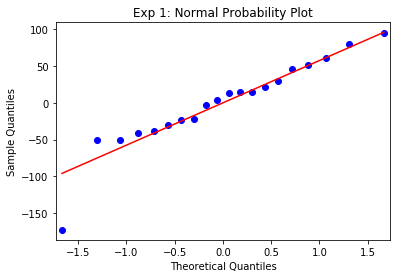

In [30]:
residuals_plot(mod2_I, dataset2, 'iIn')

In [ ]:
#mse

In [7]:
#Display variance-covariance matrix for by hand calculations of parameter CTs for experiment 1 
mod1.cov_params()

,Intercept,X1,X2
Intercept,0.382713,-0.144466,-0.186150
X1,-0.144466,0.100778,0.040085
X2,-0.186150,0.040085,0.140659


In [9]:
# Examine parameter covariance matrix for experiment 1
print('Exp 1: Parameter covariance for experiment 1 without constant term.')
matrix1 = mod1.cov_params()
print(matrix1.iloc[1:3,1:3])

# Examine parameter covariance matrix for experiment 2
print('Exp 2: Parameter covariance for experiment 2 without constant term.')
matrix2= mod2.cov_params()
print(matrix2.iloc[1:3,1:3])


Exp 1: Parameter covariance for experiment 1 without constant term.
          X1        X2
X1  0.100778  0.040085
X2  0.040085  0.140659
Exp 2: Parameter covariance for experiment 2 without constant term.
          XX1       XX2
XX1  8.163459  6.239744
XX2  6.239744  4.963316


In [10]:
#Calculate the RMSE for Experiment 1 using statsmodels
#This helps evaluate whether or not the measurement of the output is noisy which can be used to explain values in the variance-covariance matrix.
ypred = mod1.predict(dataset[['X1','X2']])
RMSE_mod1 = round(rmse(dataset['Y'], ypred),4)

#Calculate the RMSE for Experiment 2
#This helps evaluate whether or not the measurement of the output is noisy which can be used to explain values in the variance-covariance matrix.
ypred = mod2.predict(dataset[['XX1','XX2']])
RMSE_mod2 = round(rmse(dataset['YY'], ypred),4)

print('The RMSE for Model 1 is ' + str(RMSE_mod1) + ' and the RMSE for Model 2 is ' + str(RMSE_mod2) + '.')

The RMSE for Model 1 is 0.8533 and the RMSE for Model 2 is 1.4473.


Text(0.5, 0, 'Param1')

<Figure size 432x288 with 0 Axes>

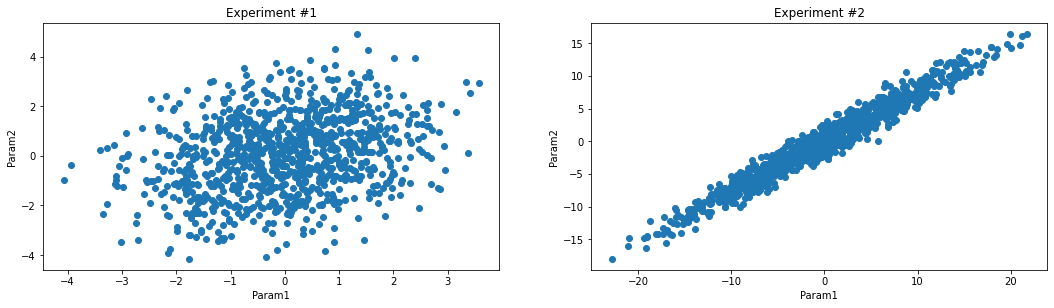

In [11]:
#using bootstrapping to study the relationship between Parameter 1 and Parameter 2

tblA = dataset[['X1','X2']]
tblB = dataset[['XX1','XX2']]

nBoot = 1000
nPts = tblA.shape[0]
jnk = tblA.shape[1]

tbla = tblA.values.reshape(-1,2)
tblb = tblB.values.reshape(-1,2)

pA = []
pB = []
x = 0
while x < nBoot:
    samp = sample(list(range(0,nPts)),nPts)
    A = tbla[samp]
    B = tblb[samp]
    modelA = ols('Y ~ 1+ A', data=dataset).fit()
    a = modelA.params.values[[1,2]]
    a=np.ndarray.tolist(a)
    pA.append(a)
    modelB = ols('YY ~ 1+ B', data=dataset).fit()
    b = modelB.params.values[[1,2]]
    b=np.ndarray.tolist(b)
    pB.append(b)
    if x == nBoot:
        break
    x +=1
pA = np.array(pA)
pB = np.array(pB)

f3 = plt.figure()
figure, axes = plt.subplots(figsize=(18,10))

#plot to see how B1 and B2 covary in Experiment 1
plt.subplot(221)
plt.scatter(pA[:,0], pA[:,1])
plt.title('Experiment #1')
plt.ylabel('Param2')
plt.xlabel('Param1')


#plot to see how B1 and B2 covary in Experiment 2
plt.subplot(222)
plt.scatter(pB[:,0], pB[:,1])
plt.title('Experiment #2')
plt.ylabel('Param2')
plt.xlabel('Param1')



In [12]:
#Examine the correlation between inputs
print('Input Correlation Matrix for experiment #1. Note low correlation')
print(np.corrcoef(dataset['X1'],dataset['X2']))
print('Input Correlation Matrix for experiment #2. Note high correlation')
print(np.corrcoef(dataset['XX1'],dataset['XX2']))

Input Correlation Matrix for experiment #1. Note low correlation
[[ 1.         -0.33668006]
 [-0.33668006  1.        ]]
Input Correlation Matrix for experiment #2. Note high correlation
[[ 1.         -0.98026549]
 [-0.98026549  1.        ]]
